In [4]:
Date_list=[]
Cat_list=[]
content_list=[]
txt=open('./Hamshahri-Corpus.txt','r').read()
split_txt=txt.split('.DID')
del split_txt[0]
for content in split_txt:
  lines=content.split('\n')
  Date_list.append(lines[1].split('\t')[1])
  Cat_list.append(lines[2].split('\t')[1])
  content_list.append(' '.join(lines[3:]))

In [2]:
import pandas as pd
columns=['Content']
dataset=pd.DataFrame(content_list,columns=columns)
dataset.head()

,Content
0,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...
1,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...
2,برديوار نگارخانه ها گالري گلستان: نمايشگاه ط...
3,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ...
4,تخته سياه و غباري كه سترده نمي شود... اشاره; ...


In [3]:
dataset['Date']=Date_list
dataset['Category']=Cat_list
dataset.head()

,Content,Date,Category
0,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...,75\04\02,adabh
1,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...,75\04\02,adabh
2,برديوار نگارخانه ها گالري گلستان: نمايشگاه ط...,75\04\02,adabh
3,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ...,75\04\02,ejtem
4,تخته سياه و غباري كه سترده نمي شود... اشاره; ...,75\04\02,elmfa


In [4]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample Persian text
persian_text = ' '.join(content_list[0:])
# Tokenize the text into words
words = nltk.word_tokenize(persian_text)

# Join the words back into sentences for TF-IDF calculation
sentences = [' '.join(words)]

# Compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF scores for each word
word_scores = {}
for col in tfidf_matrix.nonzero()[1]:
    word_scores[feature_names[col]] = tfidf_matrix[0, col]

# Sort the words by TF-IDF score
sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 important and frequently used words
print("Top 10 important and frequently used words:")
for word, score in sorted_words[:10]:
    print(f"{word}: {score}")

In [10]:
Date_list=[]
Cat_list=[]
content_list=[]
txt=open('./Hamshahri-Corpus.txt','r').read()
split_txt=txt.split('.DID')
del split_txt[0]


In [19]:
persian_text_visualize = ' '.join(content_list[0:])
persian_text = content_list[0]
#persian_text="در تمامی دوره‌های تاریخی، مردم از حیوانات بهره برده‌اند. در زمان های گذشته، حیوانات از اهمیت بالایی برخوردار بوده‌اند."

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud_fa import WordCloudFa
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# Sample Persian text data
persian_text = content_list[0]

# Create DataFrame with Persian text data
df = pd.DataFrame({'text': [persian_text]})

# Word Cloud
all_text = ' '.join(df['text'])
wordcloud = WordCloudFa(width=800, height=400, background_color='white',no_reshape=True).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

AttributeError: 'ImageDraw' object has no attribute 'textsize'

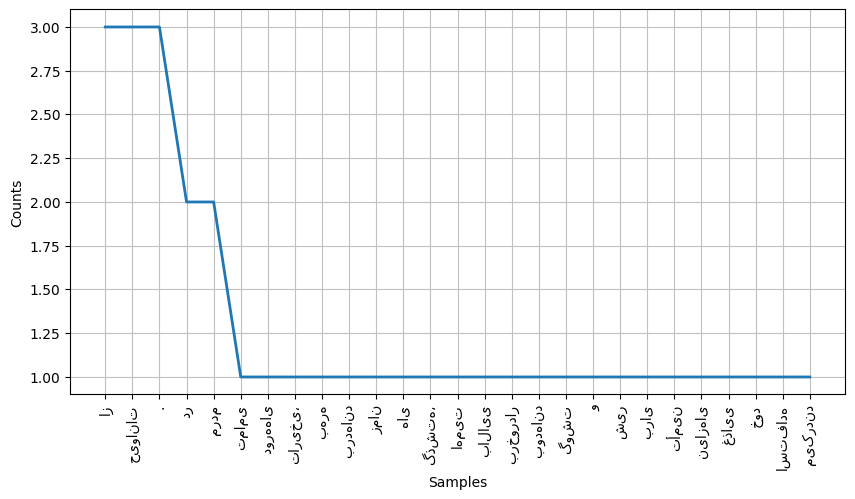

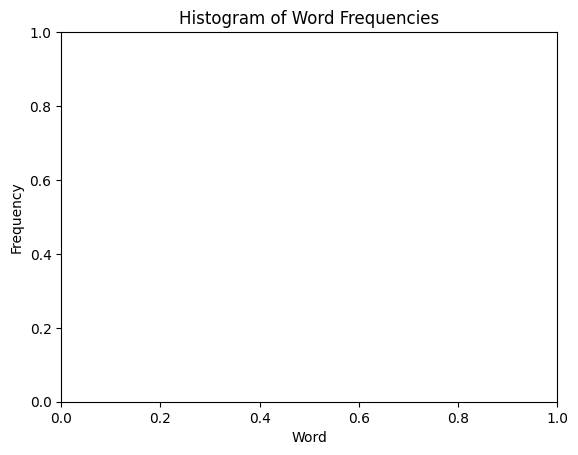

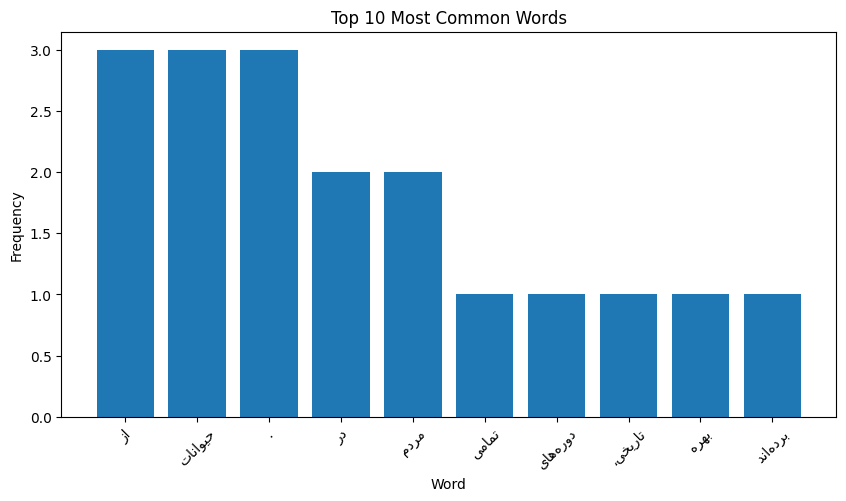

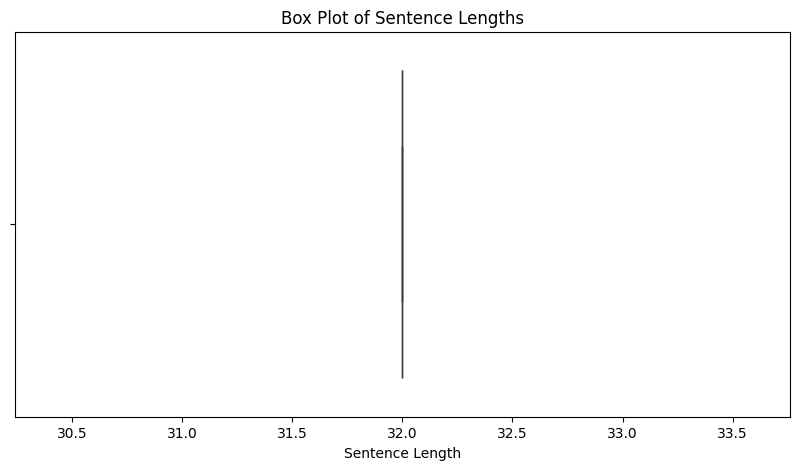

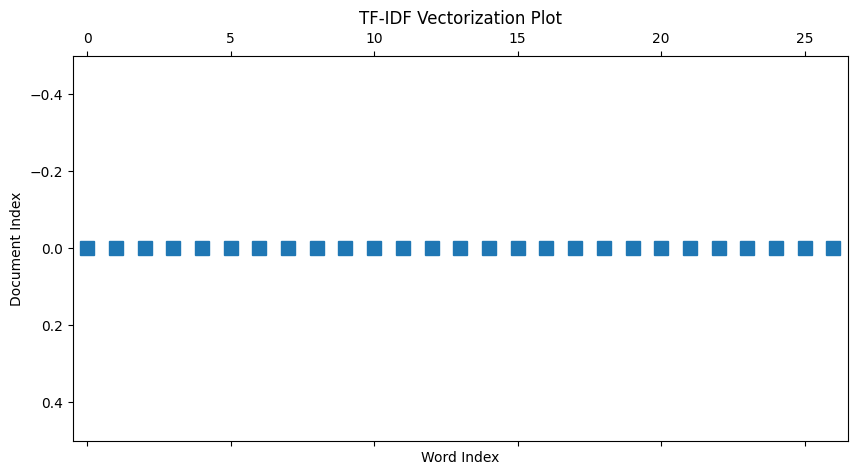

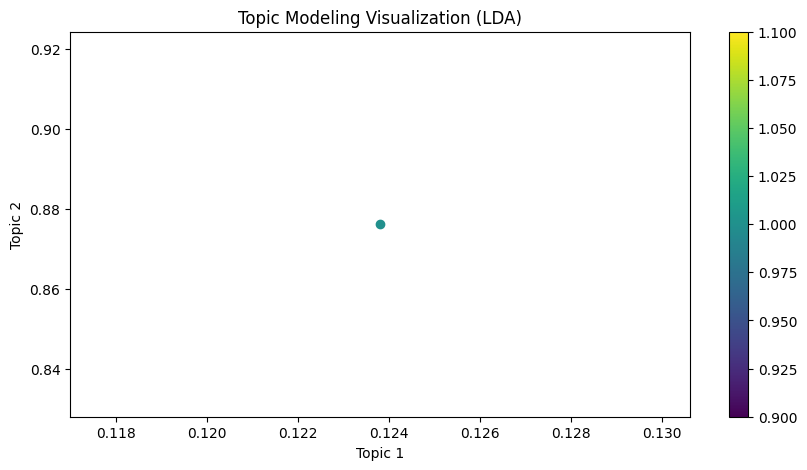

/home/ajf/Share/PhD_Mechatronics/semester_2/ML_Applied/HomeWork/Applied_ML_Course/Ml-HW1/.venv/lib/python3.10/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


ValueError: perplexity must be less than n_samples

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud_fa import WordCloudFa
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import numpy as np


# Sample Persian text data
persian_text = """
در تمامی دوره‌های تاریخی، مردم از حیوانات بهره برده‌اند. در زمان های گذشته، حیوانات از اهمیت بالایی برخوردار بوده‌اند.
مردم از گوشت و شیر حیوانات برای تأمین نیازهای غذایی خود استفاده می‌کردند.
"""

# Create DataFrame with Persian text data
df = pd.DataFrame({'text': [persian_text]})

"""# Word Cloud
all_text = ' '.join(df['text'])
wordcloud = WordCloudFa(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()"""

# Histogram of Word Frequencies
tokens = word_tokenize(all_text)
freq_dist = FreqDist(tokens)
plt.figure(figsize=(10, 5))
freq_dist.plot(50, cumulative=False)
plt.title('Histogram of Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Bar Plot of Most Common Words
common_words = freq_dist.most_common(10)
plt.figure(figsize=(10, 5))
plt.bar([get_display(reshape(word[0])) for word in common_words], [word[1] for word in common_words])
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Sentence Lengths
df['sentence_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentence_length')
plt.title('Box Plot of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.show()

# TF-IDF Vectorization Plot
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plt.figure(figsize=(10, 5))
plt.spy(tfidf_matrix, aspect='auto')
plt.title('TF-IDF Vectorization Plot')
plt.xlabel('Word Index')
plt.ylabel('Document Index')
plt.show()

# Topic Modeling Visualization (LDA)
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)
plt.figure(figsize=(10, 5))
plt.scatter(lda_topic_matrix[:, 0], lda_topic_matrix[:, 1], c=np.argmax(lda_topic_matrix, axis=1))
plt.title('Topic Modeling Visualization (LDA)')
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.colorbar()
plt.show()

# Word Embedding Visualization (t-SNE)
tsne_model = TSNE(n_components=2, random_state=42)
word_embeddings = TruncatedSVD(n_components=10).fit_transform(tfidf_matrix)
tsne_embeddings = tsne_model.fit_transform(word_embeddings)
plt.figure(figsize=(10, 5))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title('Word Embedding Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()